In [2]:
import pandas as pd
import numpy as np
#import matplotlib as plt
import matplotlib.pyplot as plt



In [3]:
city_data = "../raw_data/city_data.csv"
city_data_df = pd.read_csv(city_data)
city_data_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [36]:
city_data_by_type = city_data_df.groupby('type').driver_count.sum()
city_data_by_type.head()
d = city_data_by_type
d.head()

type
Rural        104
Suburban     638
Urban       2607
Name: driver_count, dtype: int64

In [4]:
ride_data = "../raw_data/ride_data.csv"
ride_data_df = pd.read_csv(ride_data)
ride_data_df.head()


,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [5]:
#joining raw files
whole_data_df = pd.merge(city_data_df,ride_data_df,on='city')
#city_data_df.join(ride_data_df, on=city, how='left', lsuffix='', rsuffix='', sort=False)
whole_data_df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [6]:

# * Average Fare ($) Per City
average_fare = whole_data_df.groupby('city').fare.mean()
average_fare.head()



city
Alvarezhaven    23.928710
Alyssaberg      20.609615
Anitamouth      37.315556
Antoniomouth    23.625000
Aprilchester    21.981579
Name: fare, dtype: float64

In [7]:
# * Total Number of Rides Per City
ride_per_city = whole_data_df.groupby('city').ride_id.count()
ride_per_city.head()


city
Alvarezhaven    31
Alyssaberg      26
Anitamouth       9
Antoniomouth    22
Aprilchester    19
Name: ride_id, dtype: int64

In [8]:
# * Total Number of Drivers Per City
city_data_df.head()
driver_per_city = whole_data_df.groupby('city').driver_count.sum()
driver_per_city.head()



city
Alvarezhaven     651
Alyssaberg      1742
Anitamouth       144
Antoniomouth     462
Aprilchester     931
Name: driver_count, dtype: int64

In [9]:
# * City Type (Urban, Suburban, Rural)
whole_data_df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [10]:
city_type = whole_data_df.type.unique()
city_type

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [11]:
average_fare_by_city_type = whole_data_df.groupby(['type', 'fare']).mean()
#data.groupby(['col1', 'col2']).mean()
average_fare_by_city_type.head()

driver_count       ride_id
type  fare                             
Rural 10.33           6.0  1.819119e+12
      10.41          10.0  9.823290e+12
      10.64           9.0  1.406025e+12
      10.66           3.0  9.287766e+12
      11.15           5.0  8.622534e+12

In [24]:
x = whole_data_df.groupby('type').fare.sum()

type(x)

x_df = pd.DataFrame(x)

x_df.reset_index(inplace = True)

x_df

total_fare = x_df['fare'].sum()

total_fare

x_df['fare_percentage'] = x_df['fare']*100/total_fare

x_df

,type,fare,fare_percentage
0,Rural,4255.09,6.579786
1,Suburban,20335.69,31.445750
2,Urban,40078.34,61.974463


In [13]:
labels = ['Rural','Urban','Suburban']

In [ ]:
% = 

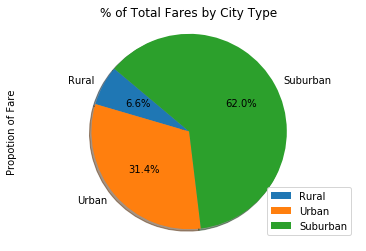

In [27]:
#* % of Total Fares by City Type
pie = plt.pie(x_df['fare_percentage'],labels=labels,
autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis('equal')
plt.title("% of Total Fares by City Type")
plt.legend(loc="lower right", fancybox=True)
plt.ylabel("Propotion of Fare")
plt.show()

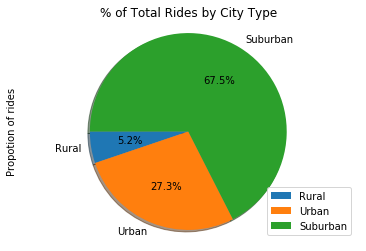

In [39]:
# * % of Total Rides by City Type
whole_data_df.head()
r = whole_data_df.groupby('type').ride_id.count()
pie = plt.pie(r,labels=labels,
autopct="%1.1f%%", shadow=True, startangle=540)
plt.axis('equal')
plt.legend(loc="lower right", fancybox=True)
plt.ylabel("Propotion of rides")
plt.title("% of Total Rides by City Type") 
plt.show()

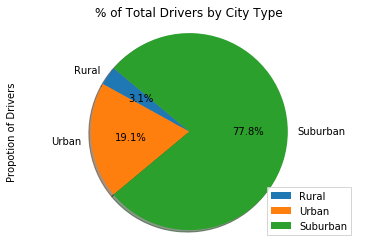

In [37]:
# * % of Total Drivers by City Type
#d = whole_data_df.groupby('type').driver_count.sum()
plt.pie(d,labels=labels,
       autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis('equal')
plt.title("% of Total Drivers by City Type") 
plt.legend(loc="lower right", fancybox=False)
plt.ylabel("Propotion of Drivers")
plt.show()


In [ ]:
#bubble chart
